In [185]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [26]:
df=pd.read_csv('big_data_mart.csv')

In [27]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [28]:
df.shape

(8523, 12)

In [29]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [31]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [32]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="most_frequent")
df["Outlet_Size"]=si.fit_transform(df["Outlet_Size"].values.reshape(-1,1))
df["Item_Weight"]=si.fit_transform(df["Item_Weight"].values.reshape(-1,1))

In [33]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [34]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017843,0.025258,0.035689,0.006443
Item_Visibility,-0.017843,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025258,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.035689,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.006443,-0.128625,0.567574,-0.049135,1.000000


In [35]:
l=["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]

In [36]:
df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [37]:
le=LabelEncoder()
df["Outlet_Type"]=le.fit_transform(df["Outlet_Type"].astype("str"))

In [38]:
df["Item_Identifier"]=le.fit_transform(df["Item_Identifier"].astype("str"))
df["Item_Fat_Content"]=le.fit_transform(df["Item_Fat_Content"].astype("str"))
df["Item_Type"]=le.fit_transform(df["Item_Type"].astype("str"))
df["Outlet_Identifier"]=le.fit_transform(df["Outlet_Identifier"].astype("str"))
df["Outlet_Size"]=le.fit_transform(df["Outlet_Size"].astype("str"))
df["Outlet_Location_Type"]=le.fit_transform(df["Outlet_Location_Type"].astype("str"))

In [39]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


<AxesSubplot:>

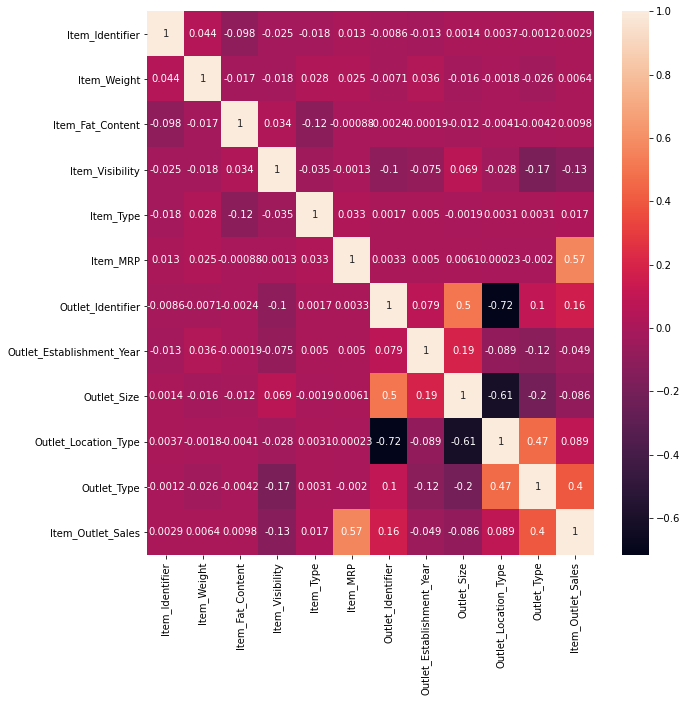

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Item_Identifier                 AxesSubplot(0.125,0.749828;0.133621x0.130172)
Item_Weight                  AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Item_Fat_Content              AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Item_Visibility              AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Item_Type                    AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Item_MRP                        AxesSubplot(0.125,0.593621;0.133621x0.130172)
Outlet_Identifier            AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Outlet_Establishment_Year     AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Outlet_Size                  AxesSubplot(0.606034,0.593621;0.133621x0.130172)
Outlet_Location_Type         AxesSubplot(0.766379,0.593621;0.133621x0.130172)
Outlet_Type                     AxesSubplot(0.125,0.437414;0.133621x0.130172)
Item_Outlet_Sales            AxesSubplot(0.285345,0.437414;0.133621x0.130172)
dtype: object

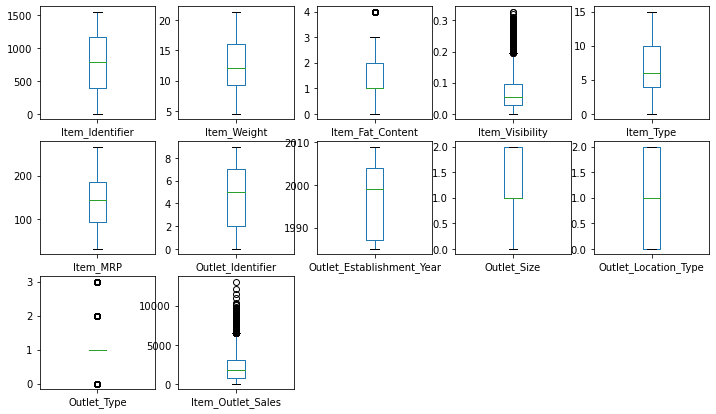

In [41]:
df.plot(kind="box",subplots=True,layout=(5,5),fontsize = 10, figsize = (12,12))

In [42]:
#df.plot(kind="bar",subplots=True,layout=(5,5),fontsize = 10, figsize = (12,12))

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

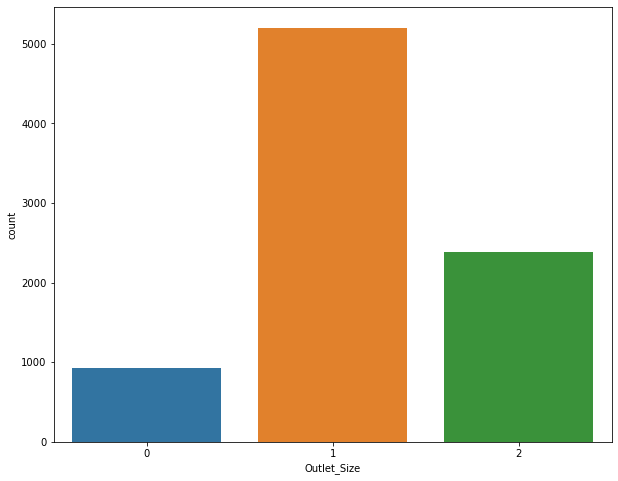

In [43]:
plt.figure(figsize = (10,8))
sns.countplot(df.Outlet_Size)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

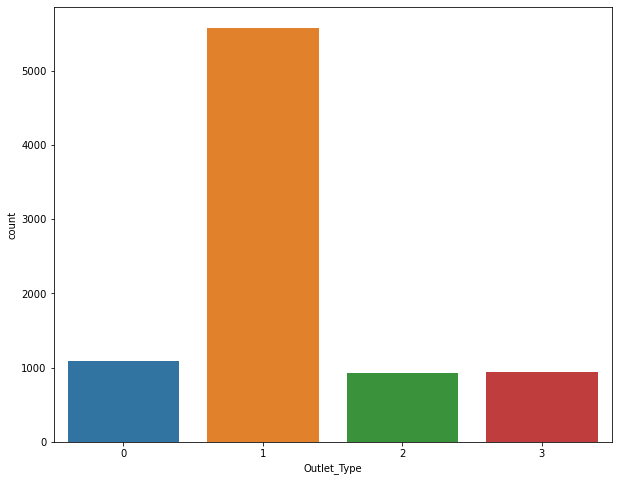

In [44]:
plt.figure(figsize = (10,8))
sns.countplot(df.Outlet_Type)

In [45]:
from sklearn.preprocessing import StandardScaler

In [88]:
y=df["Item_Outlet_Sales"]

In [89]:
x=df.drop("Item_Outlet_Sales", axis=1)

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
y.shape

(8523,)

In [92]:
x.shape

(8523, 11)

In [93]:
z=np.abs(zscore(df))

In [94]:
z

array([[1.38851383, 0.81151126, 0.57284357, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [1.71799137, 1.60975569, 0.97809218, ..., 1.09156913, 1.00297245,
        1.01844035],
       [0.26205684, 1.12505806, 0.57284357, ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [1.28515188, 0.50449417, 0.57284357, ..., 0.13888236, 0.25265831,
        0.57909963],
       [0.21975905, 1.30510027, 0.97809218, ..., 1.09156913, 1.00297245,
        0.19672492],
       [1.62449099, 0.48740719, 0.57284357, ..., 1.36933384, 0.25265831,
        0.82959407]])

In [95]:
threshold=3
print(np.where(z>3))

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
        333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
        615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
        991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
       1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
       1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
       1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
       2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
       2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
       2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
       3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
       3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
       3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
       3884, 3993, 4006, 4019, 4083, 4163, 4219, 4

In [96]:
df.shape

(8523, 12)

In [74]:
scalar=StandardScaler()
x=pd.DataFrame(scalar.fit_transform(x))

In [139]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2


In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor

In [141]:
y=df["Item_Outlet_Sales"]
x=df.drop("Item_Outlet_Sales", axis=1)

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=43)
print(x_train.shape,y_train.shape)

(6647, 11) (6647,)


In [154]:
lr=LinearRegression()
lr

LinearRegression()

In [164]:
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Predict Price",predlr)

Predict Price [1030.43155983 3034.59987241 1112.82280386 ... 3626.37802614 4520.8110924
 2474.75633805]


In [156]:
from sklearn.metrics import accuracy_score , mean_squared_error, mean_absolute_error

In [157]:
print(mean_absolute_error(y_test,pred))

880.5352171752603


In [158]:
dtr=DecisionTreeRegressor()
dtr

DecisionTreeRegressor()

In [165]:
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print("predict sales",pred)

predict sales [ 916.1408 4040.7402 1744.396  ... 2271.0438 3179.8608  565.2642]


In [166]:
from sklearn.metrics import r2_score

In [178]:
print(r2_score(y_test,predlr))
print(r2_score(y_test,pred))

0.5032282467876479
0.21953524354030807


In [170]:
from sklearn.svm import SVR

In [176]:
sr=SVR()
sr.fit(x_train,y_train)
predsr=sr.predict(x_test)
print("predict sales:", predsr)

predict sales: [1789.73408036 1815.6608628  1802.21014095 ... 1811.24149528 1806.69816195
 1812.2634464 ]


In [183]:
print(r2_score(y_test,predsr))

-0.03511518788965229


In [191]:
import pickle
filename="Big Dart Project"
pickle.dump(lr,open(filename,'wb'))